# TRABALHO DE IAA015 – Tópicos de Inteligência Artificial

## Equipe 03
* Gustavo Costa de Souza
* Marcos Vinicius de Melo
* Marcus Eneas Silveira Galvao do Rio Apa II
* Patrícia Verdugo Pascoal
* Rodrigo de Araujo
* William de Souza Alencar

Este trabalho deve ser realizado em equipes de 3 a 6 integrantes. 
Adicionar o NOME COMPLETO de todos os integrantes da equipe. 
Entregar como um documento PDF com todas as respostas. 
 
ATENÇÃO:  É  UM  trabalho  nessa  disciplina  formado  por  DOIS  exercícios:  (1)  algoritmo  genético;  (2) 
visualização com a PCA de dois modelos vetoriais do mesmo texto. 
 
Cada questão tem o peso de 50% da nota. 

1) Algoritmo Genético  
Problema do Caixeiro Viajante 
 
A Solução poderá ser apresentada em: Python (preferencialmente), ou em R, ou em Matlab, ou em C ou 
em Java. 
 
Considere o seguinte problema de otimização (a escolha do número de 100 cidades foi feita simplesmente 
para tornar o problema intratável. A solução ótima para este problema não é conhecida). 
 
Suponha  que  um  caixeiro  deva  partir  de  sua  cidade,  visitar  clientes  em  outras  99  cidades  diferentes,  e 
então  retornar  à  sua  cidade.  Dadas  as  coordenadas  das  100  cidades,  descubra  o  percurso  de  menor 
distância que passe uma única vez por todas as cidades e retorne à cidade de origem. 
 
Para  tornar  a  coisa  mais  interessante,  as  coordenadas  das  cidades  deverão  ser  sorteadas  (aleatórias), 
considere que cada cidade possui um par de coordenadas (x e y) em um espaço limitado de 100 por 100 
pixels. 
 
O  relatório  deverá  conter  no  mínimo  a  primeira  melhor  solução  (obtida  aleatoriamente  na  geração  da 
população inicial) e a melhor solução obtida após um número mínimo de 1000 gerações. Gere as imagens 
em 2d dos pontos (cidades) e do caminho. 
 
Sugestão:  
(1) considere o cromossomo formado pelas cidades, onde a cidade de início (escolhida 
aleatoriamente) deverá estar na posição 0 e 100 e a ordem das cidades visitadas nas posições de 
1 a 99 deverão ser definidas pelo algoritmo genético. 
(2) A função de avaliação deverá minimizar a distância euclidiana entre as cidades (os pontos). 
(3) Utilize no mínimo uma população com 100 indivíduos; 
(4) Utilize no mínimo 1% de novos indivíduos obtidos pelo operador de mutação; 
(5) Utilize no mínimo de 90% de novos indivíduos obtidos pelo método de cruzamento (crossover-
ox); 
(6) Preserve sempre a melhor solução de uma geração para outra. 
 
Importante: A solução deverá implementar os operadores de “cruzamento” e “mutação”.

In [22]:
import math
import matplotlib.pyplot as plt
import random

# constantes
num_cidades = 100

# lista com as coordenadas  das  cidades  deverão  ser  sorteadas  (aleatórias), considere que cada cidade possui um par de coordenadas (x e y) em um espaço limitado de 100 por 100 pixels.
def gerar_coordenadas(num_cidades):
    coordenadas = []
    for _ in range(num_cidades):
        x = random.randint(0, 100)
        y = random.randint(0, 100)
        coordenadas.append((x, y))
    return coordenadas

coordenadas_cidades = gerar_coordenadas(num_cidades)
print(coordenadas_cidades)


[(83, 70), (25, 94), (70, 13), (3, 27), (78, 89), (100, 85), (47, 55), (85, 30), (69, 88), (65, 19), (73, 40), (20, 63), (4, 47), (81, 81), (65, 25), (75, 24), (84, 50), (76, 30), (100, 4), (66, 21), (28, 16), (9, 20), (14, 99), (73, 3), (82, 6), (99, 0), (36, 95), (65, 61), (11, 17), (70, 80), (71, 42), (20, 16), (44, 75), (67, 46), (31, 31), (33, 3), (79, 79), (43, 14), (82, 90), (49, 65), (55, 6), (29, 34), (40, 63), (72, 90), (18, 96), (85, 87), (80, 0), (3, 86), (76, 23), (80, 72), (10, 52), (88, 12), (90, 68), (13, 98), (83, 74), (29, 3), (12, 42), (72, 63), (89, 15), (4, 95), (7, 43), (61, 28), (6, 6), (24, 91), (56, 67), (39, 81), (64, 27), (46, 35), (41, 53), (63, 49), (44, 80), (39, 95), (4, 81), (23, 70), (3, 53), (98, 22), (75, 70), (76, 70), (48, 52), (92, 35), (51, 12), (42, 3), (9, 10), (77, 47), (85, 12), (75, 89), (93, 65), (33, 90), (99, 13), (40, 12), (99, 89), (6, 47), (22, 92), (82, 16), (85, 34), (43, 16), (100, 32), (95, 64), (14, 20), (90, 88)]


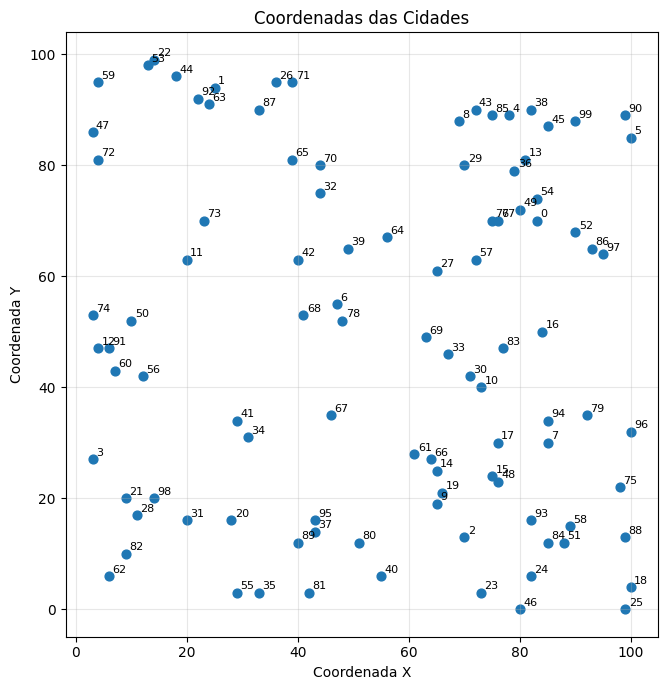

In [23]:
# plotar coordenadas_cidades
xs, ys = zip(*coordenadas_cidades)

plt.figure(figsize=(7,7))
plt.scatter(xs, ys, color='tab:blue', s=40)
for i, (x, y) in enumerate(coordenadas_cidades):
    plt.text(x + 0.6, y + 0.6, str(i), fontsize=8)  # rótulo com índice da cidade

plt.title("Coordenadas das Cidades")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.grid(alpha=0.3)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

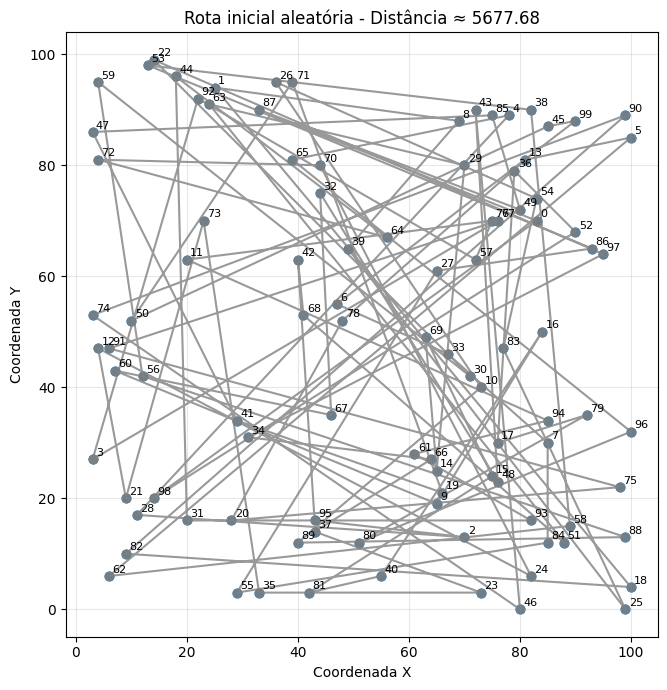

In [24]:
# um  caixeiro  deva  partir  de  sua  cidade,  visitar  clientes  em  outras  99  cidades  diferentes,  e 
# então  retornar  à  sua  cidade.  Dadas  as  coordenadas  das  100  cidades,  descubra  o  percurso  de  menor 
# distância que passe uma única vez por todas as cidades e retorne à cidade de origem

def calcular_distancia(cidade1, cidade2):
    return math.sqrt((cidade1[0] - cidade2[0]) ** 2 + (cidade1[1] - cidade2[1]) ** 2)

def calcular_percurso_total(percurso, coordenadas):
    distancia_total = 0
    for i in range(len(percurso) - 1):
        distancia_total += calcular_distancia(coordenadas[percurso[i]], coordenadas[percurso[i + 1]])
    distancia_total += calcular_distancia(coordenadas[percurso[-1]], coordenadas[percurso[0]])
    return distancia_total

# desenhar uma rota inicial aleatória ligando todas as cidades e retornando à origem
rota_inicial = list(range(len(coordenadas_cidades)))
random.shuffle(rota_inicial)

xs_rota = [coordenadas_cidades[i][0] for i in rota_inicial] + [coordenadas_cidades[rota_inicial[0]][0]]
ys_rota = [coordenadas_cidades[i][1] for i in rota_inicial] + [coordenadas_cidades[rota_inicial[0]][1]]

plt.figure(figsize=(7,7))
plt.plot(xs_rota, ys_rota, '-o', color='gray', alpha=0.8)
plt.scatter(xs, ys, color='tab:blue', s=40)
for i, (x, y) in enumerate(coordenadas_cidades):
    plt.text(x + 0.6, y + 0.6, str(i), fontsize=8)

# plotar distâncias da rota inicial
distancia_inicial = calcular_percurso_total(rota_inicial, coordenadas_cidades)
plt.title(f"Rota inicial aleatória - Distância ≈ {distancia_inicial:.2f}")

plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.grid(alpha=0.3)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

Pop inicial:  [[41, 20, 67, 93, 14, 73, 57, 79, 43, 90, 11, 83, 48, 61, 46, 27, 21, 18, 64, 75, 69, 32, 80, 9, 54, 72, 15, 39, 1, 71, 24, 17, 78, 38, 25, 44, 77, 76, 53, 94, 68, 36, 29, 12, 40, 50, 8, 33, 31, 47, 81, 3, 74, 84, 89, 66, 42, 26, 86, 58, 23, 55, 35, 92, 96, 56, 97, 10, 6, 99, 45, 85, 59, 5, 7, 87, 16, 82, 37, 95, 34, 70, 30, 22, 13, 4, 63, 2, 91, 0, 51, 65, 28, 60, 19, 62, 52, 49, 98, 88], [7, 84, 23, 51, 77, 24, 54, 9, 87, 28, 55, 37, 58, 20, 14, 72, 89, 76, 45, 38, 22, 83, 31, 80, 40, 99, 69, 70, 52, 92, 68, 30, 48, 71, 26, 25, 66, 47, 86, 74, 90, 82, 67, 33, 81, 34, 21, 11, 39, 4, 6, 96, 18, 49, 93, 56, 98, 16, 73, 78, 42, 15, 75, 62, 3, 63, 0, 36, 35, 88, 8, 97, 41, 12, 95, 43, 59, 53, 13, 27, 50, 65, 91, 5, 64, 10, 57, 85, 60, 44, 32, 29, 46, 61, 94, 2, 79, 19, 17, 1], [70, 44, 72, 56, 33, 53, 78, 82, 93, 69, 95, 3, 4, 61, 16, 80, 66, 71, 40, 97, 94, 0, 24, 89, 2, 73, 23, 38, 28, 20, 45, 34, 90, 25, 52, 65, 59, 29, 87, 68, 46, 39, 18, 13, 15, 79, 9, 63, 47, 85, 30, 5

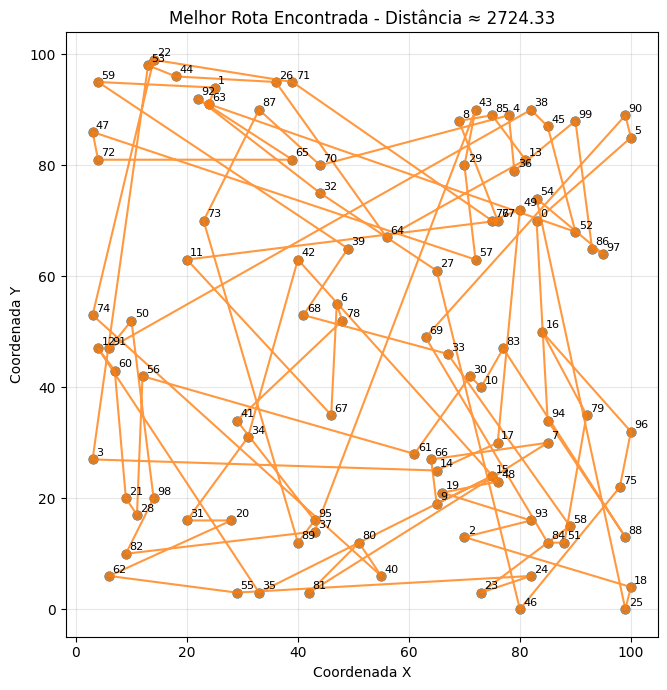

In [26]:
TAMANHO_POPULACAO = 100

#
#  Passo 1 do AG, cria a populacao inicial
#
def populacaoInicial(tamanho, coordenadas_cidades):
    resultado = []
    n = len(coordenadas_cidades)
    for _ in range(tamanho):
        rota = list(range(n))
        random.shuffle(rota)          # shuffle atua in-place
        resultado.append(rota)       # append a rota (não o retorno de shuffle)
    return resultado


def avaliacao(populacao, coordenadas_cidades):
  fit = []
  for v in populacao:
    fx = calcular_percurso_total(v, coordenadas_cidades)
    if fx == 0:
      fit.append( 999999 )
    else:
      fit.append( abs(1/fx) );
  return fit;


def preservaMelhor(geracao, nova, coordenadas_cidades):
  ava = avaliacao(geracao, coordenadas_cidades)
  maior = 0;
  for i in range(1,len(ava)):
    #print(f'comparando {maior} ({geracao[maior]} : {ava[maior]}) com {i} ({geracao[i]} :{ava[i]}) ')
    if ava[maior] < ava[i]:
      maior = i
  nova.append( geracao[maior] )
  #print('melhor: ', nova, geracao[maior])
  return geracao[maior]

def bit2vet(valor):
  res = [];
  for i in range(0,32):
    if valor & (0x01<<i) > 0:
      res.insert(0,1);
    else:
      res.insert(0,0);
  return res;

def bin2num(vet):
  num = 0;
  if vet[0] == 1:
    # num negativos
    for i in range(1,32):
      if vet[i]==0:
        num = num + 2**(31-i);
    num = -1 - num;
  else:
    for i in range(1,32):
      if vet[i]>0:
        num = num + 2**(31-i);
  return num;

def order_crossover(p1, p2):
    """Order Crossover (OX) para permutações (rotas)."""
    n = len(p1)
    a, b = sorted(random.sample(range(n), 2))
    child = [-1] * n
    # copia o segmento do pai1
    child[a:b] = p1[a:b]
    # preenche o resto na ordem do pai2
    pos = b % n
    for gene in p2[b:] + p2[:b]:
        if gene not in child:
            child[pos] = gene
            pos = (pos + 1) % n
    return child

def cruzamento(pop, qdade, nova):
    """
    Gera `qdade` filhos válidos a partir da população `pop` usando OX.
    Adiciona os filhos na lista `nova`.
    """
    qdeSaida = len(nova) + qdade
    while len(nova) < qdeSaida:
        indA, indB = random.sample(range(len(pop)), 2)
        p1 = pop[indA]
        p2 = pop[indB]
        # gera dois filhos (troca ordem dos pais)
        f1 = order_crossover(p1, p2)
        f2 = order_crossover(p2, p1)
        nova.append(f1)
        if len(nova) < qdeSaida:
            nova.append(f2)

def mutacao(pop, qdade, nova):
    """
    Mutação para população de permutações (TSP).
    Realiza swap mutation: escolhe um indivíduo pai aleatório, copia e troca duas posições.
    Adiciona `qdade` filhos mutados na lista `nova`.
    """
    qdeSaida = len(nova) + qdade
    n = len(pop[0])
    while len(nova) < qdeSaida:
        pai = random.choice(pop)
        filho = pai.copy()
        i, j = random.sample(range(n), 2)
        filho[i], filho[j] = filho[j], filho[i]
        nova.append(filho)

# passo 1
p0 = populacaoInicial(TAMANHO_POPULACAO, coordenadas_cidades);
print("Pop inicial: ", p0);
# avalia a pop. inicial
a0 = avaliacao(p0, coordenadas_cidades);
print("Avaliação", a0)

# fazemos a iteração, passos 3,4 e 5 do AG
geracao = p0;
numGeracoes = 1000;
while numGeracoes>0:
  nova = [];
  preservaMelhor(geracao,nova, coordenadas_cidades);
  cruzamento(geracao, 3, nova);
  mutacao(geracao, 1, nova);
  numGeracoes=numGeracoes-1;  
  av = avaliacao(nova, coordenadas_cidades);
  # ordena a geracao com base na avaliacao
  nova2 = sorted(zip(av,nova),reverse=True)
  geracao = [x for _,x in nova2]
  print( f'Geracao {numGeracoes}')

print(f'A melhor solucao encontrada: {geracao[0]}')
#print(nova);

#plotar a melhor rota encontrada
melhor_rota = geracao[0]
xs_melhor_rota = [coordenadas_cidades[i][0] for i in melhor_rota] + [coordenadas_cidades[melhor_rota[0]][0]]
ys_melhor_rota = [coordenadas_cidades[i][1] for i in melhor_rota] + [coordenadas_cidades[melhor_rota[0]][1]]
plt.figure(figsize=(7,7))
plt.plot(xs_melhor_rota, ys_melhor_rota, '-o', color='tab:orange', alpha=0.8)
plt.scatter(xs, ys, color='tab:blue', s=40)
for i, (x, y) in enumerate(coordenadas_cidades):
    plt.text(x + 0.6, y + 0.6, str(i), fontsize=8)
distancia_melhor = calcular_percurso_total(melhor_rota, coordenadas_cidades)
plt.title(f"Melhor Rota Encontrada - Distância ≈ {distancia_melhor:.2f}")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.grid(alpha=0.3)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()



2) Compare a representação de dois modelos vetoriais  

Pegue um texto relativamente pequeno, o objetivo será visualizar a representação vetorial, que poderá 
ser um vetor por palavra ou por sentença. Seja qual for a situação, considere a quantidade de palavras ou 
sentenças onde tenha no mínimo duas similares e no mínimo 6 textos, que deverão produzir no mínimo 
6 vetores. Também limite o número máximo, para que a visualização fique clara e objetiva. 
 
O  trabalho  consiste  em  pegar  os  fragmentos  de  texto  e  codificá-las  na  forma  vetorial.  Após  obter  os 
vetores, imprima-os em figuras (plot) que demonstrem a projeção desses vetores usando a PCA. 
 
O PDF deverá conter o código-fonte e as imagens obtidas.